In [28]:
#Data sets are placed in the same folder path.
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'STXihei'
import numpy as np
import pandas as pd

# Data initialization

In [29]:
df = pd.read_csv("sweet.csv")
df = df.iloc[:,1:]
df

,Bounty,Snickers,Milky Way,Mars,Galaxy Caramel,Twix,Galaxy,Maltesers Teaser
0,1,4,5,4,5,3,4,4
1,3,4,4,5,4,4,4,5
2,5,5,5,4,4,3,5,5
3,4,3,3,3,4,4,3,2
4,2,4,4,4,3,4,1,4
...,...,...,...,...,...,...,...,...
95,5,1,5,4,4,3,4,5
96,5,3,4,5,5,4,4,5
97,2,4,1,5,4,2,3,2
98,4,5,3,4,4,4,4,4


In [30]:
item = ["I dislike them them a lot", "I dislike them", "Neutrals and Don't Know", "I like them", "I like them a lot"]
color = ["red","blue","black","orange","green"]

Data preparation

In [31]:
labels = list(df.columns)
data = np.zeros(shape = (5,8),dtype = "int")
for i in range(len(labels)):
    for j in sorted(df[labels[i]].unique()):
        data[j - 1][i]= len(df[df[labels[i]] == j])
data = data/100
print("The probability:")
data

The probability:


array([[0.14, 0.09, 0.03, 0.04, 0.02, 0.02, 0.02, 0.01],
       [0.11, 0.09, 0.06, 0.07, 0.08, 0.05, 0.04, 0.04],
       [0.15, 0.17, 0.23, 0.18, 0.17, 0.19, 0.15, 0.14],
       [0.36, 0.42, 0.52, 0.56, 0.46, 0.56, 0.51, 0.42],
       [0.24, 0.23, 0.16, 0.15, 0.27, 0.18, 0.28, 0.39]])

# Draw the imorve figure

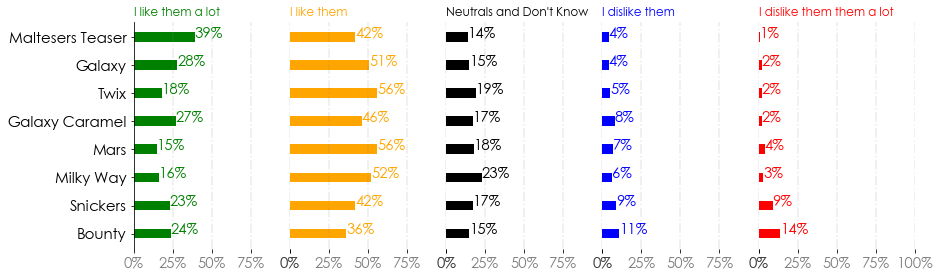

In [32]:
fig, ax = plt.subplots(1,5,figsize = (14,8.35/2))
width = 0.35
x = np.arange(len(labels))
key_la = 0
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
for i in range(len(data)):
    ax[i].set_xlim(0 - 0.175,8 + 0.175)
    ax[4-i].set_title(item[i],loc = 'left',fontsize='12', fontweight='bold', color = color[key_la])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    
    ax[4-i].barh(x, data[i], width, label = item[key_la], color = color[key_la])
    j = 0
    for per in data[i]:
        word = str(round(per*100)) + "%"
        ax[4-i].text(per, x[j], word, fontdict={'size':15}, color = color[key_la])
        j+=1
    if i == 0:
        ax[i].set_yticks([i for i in range(0,8)])
        ax[i].set_yticklabels(labels, fontdict={'size':15})
    if i != 0:
        ax[i].spines['left'].set_visible(False)
        ax[i].set_yticks([])
    if i != 4:
        ax[i].set_xticks([0,0.25,0.5,0.75,1])
        ax[i].set_xticklabels(["0%","25%","50%","75%","0%"], alpha = 0.5, fontdict={'size':15})
    elif i == 4:
        ax[i].set_xticks([0,0.25,0.5,0.75,1])
        ax[i].set_xticklabels(["0%","25%","50%","75%","100%"],alpha = 0.5, fontdict={'size':15})
    ax[i].set_xlim(0,1)
    for j in range(1,5):
        ax[i].axvline(x=j/4,ls="-.",c="gray",alpha = 0.15)
    key_la += 1
plt.savefig("new.png")
plt.show()